In [255]:
import pandas as pd
import numpy as np

In [256]:
df = pd.read_csv('C:\\Users\\swasa\\Desktop\\DS_Case_Study_beer-ratings_2020\\train.csv')

In [257]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [258]:
df.shape

(37500, 19)

In [259]:
df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [260]:
# I am using forwrdfilling method to fill the null values of 'user/ageInSeconds', 'user/birthdayRaw' and 'user/birthdayUnix'
for column in ['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix']:
    df[column].fillna(method ='ffill', inplace=True)

In [261]:
# replacing null values with mode value of 'user/gender'
df['user/gender'].fillna(df['user/gender'].mode()[0], inplace=True)

In [262]:
df.isnull().sum()

index                 0
beer/ABV              0
beer/beerId           0
beer/brewerId         0
beer/name             0
beer/style            0
review/appearance     0
review/aroma          0
review/overall        0
review/palate         0
review/taste          0
review/text          10
review/timeStruct     0
review/timeUnix       0
user/ageInSeconds     3
user/birthdayRaw      3
user/birthdayUnix     3
user/gender           0
user/profileName      5
dtype: int64

In [263]:
# missing values of columns review/text,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix and user/profileName are very less.
# hence I am romoving.
for column in ['review/text', 'user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/profileName']:
    df.dropna(subset=[column], inplace=True)

In [264]:
df.isnull().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/ageInSeconds    0
user/birthdayRaw     0
user/birthdayUnix    0
user/gender          0
user/profileName     0
dtype: int64

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37482 entries, 3 to 37499
Data columns (total 19 columns):
index                37482 non-null int64
beer/ABV             37482 non-null float64
beer/beerId          37482 non-null int64
beer/brewerId        37482 non-null int64
beer/name            37482 non-null object
beer/style           37482 non-null object
review/appearance    37482 non-null float64
review/aroma         37482 non-null float64
review/overall       37482 non-null float64
review/palate        37482 non-null float64
review/taste         37482 non-null float64
review/text          37482 non-null object
review/timeStruct    37482 non-null object
review/timeUnix      37482 non-null int64
user/ageInSeconds    37482 non-null float64
user/birthdayRaw     37482 non-null object
user/birthdayUnix    37482 non-null float64
user/gender          37482 non-null object
user/profileName     37482 non-null object
dtypes: float64(8), int64(4), object(7)
memory usage: 5.7+ MB


In [266]:
df['user/gender'].value_counts()

Male      37237
Female      245
Name: user/gender, dtype: int64

In [267]:
df['user/gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37482 entries, 3 to 37499
Data columns (total 19 columns):
index                37482 non-null int64
beer/ABV             37482 non-null float64
beer/beerId          37482 non-null int64
beer/brewerId        37482 non-null int64
beer/name            37482 non-null object
beer/style           37482 non-null object
review/appearance    37482 non-null float64
review/aroma         37482 non-null float64
review/overall       37482 non-null float64
review/palate        37482 non-null float64
review/taste         37482 non-null float64
review/text          37482 non-null object
review/timeStruct    37482 non-null object
review/timeUnix      37482 non-null int64
user/ageInSeconds    37482 non-null float64
user/birthdayRaw     37482 non-null object
user/birthdayUnix    37482 non-null float64
user/gender          37482 non-null int64
user/profileName     37482 non-null object
dtypes: float64(8), int64(5), object(6)
memory usage: 5.7+ MB


In [269]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

for column in ['beer/name', 'beer/style', 'review/text','review/timeStruct', 'user/birthdayRaw', 'user/profileName']:
    df[column] = number.fit_transform(df[column].astype('str'))

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37482 entries, 3 to 37499
Data columns (total 19 columns):
index                37482 non-null int64
beer/ABV             37482 non-null float64
beer/beerId          37482 non-null int64
beer/brewerId        37482 non-null int64
beer/name            37482 non-null int32
beer/style           37482 non-null int32
review/appearance    37482 non-null float64
review/aroma         37482 non-null float64
review/overall       37482 non-null float64
review/palate        37482 non-null float64
review/taste         37482 non-null float64
review/text          37482 non-null int32
review/timeStruct    37482 non-null int32
review/timeUnix      37482 non-null int64
user/ageInSeconds    37482 non-null float64
user/birthdayRaw     37482 non-null int32
user/birthdayUnix    37482 non-null float64
user/gender          37482 non-null int64
user/profileName     37482 non-null int32
dtypes: float64(8), int32(6), int64(5)
memory usage: 4.9 MB


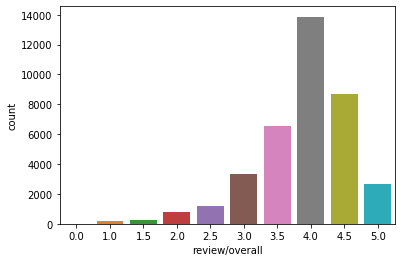

In [271]:
import seaborn as sns
sns.countplot(x = 'review/overall', data = df);

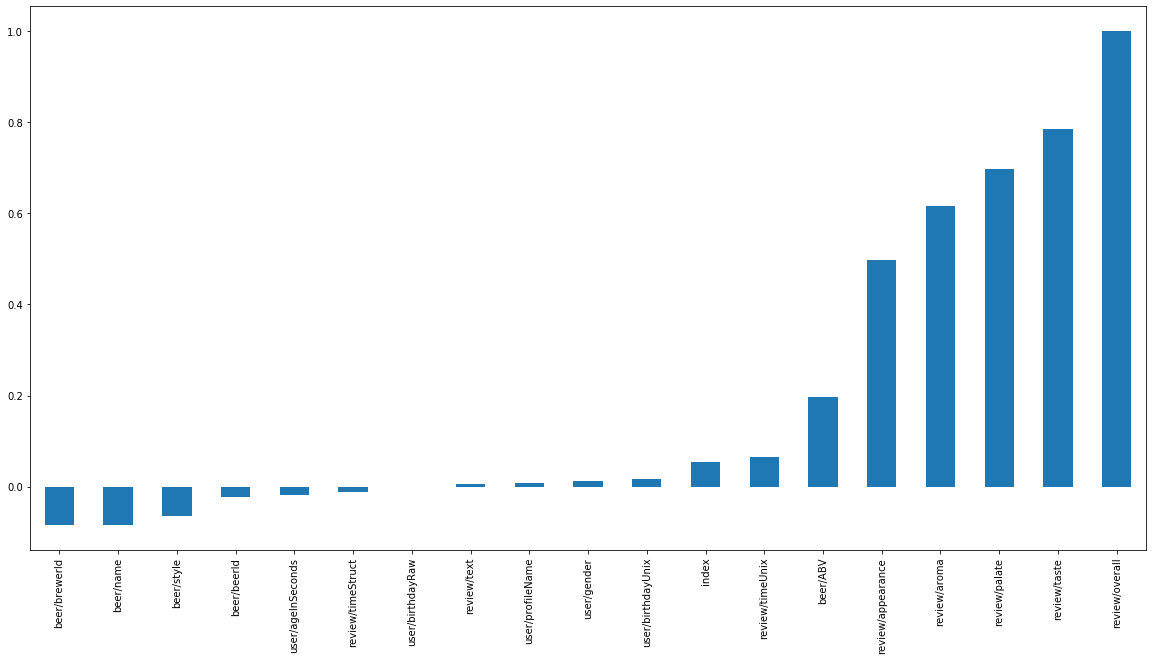

In [272]:
# Checking the corelation with bar graph
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
df.corr()['review/overall'].sort_values().plot(kind ='bar')

In [273]:
# Checking the corelation value of 'review/overall' with other features
df.corr()['review/overall'].sort_values()

beer/brewerId       -0.085038
beer/name           -0.083714
beer/style          -0.065551
beer/beerId         -0.022014
user/ageInSeconds   -0.017570
review/timeStruct   -0.011534
user/birthdayRaw    -0.001020
review/text          0.005662
user/profileName     0.007902
user/gender          0.011650
user/birthdayUnix    0.017570
index                0.054443
review/timeUnix      0.065359
beer/ABV             0.196839
review/appearance    0.498608
review/aroma         0.616077
review/palate        0.697217
review/taste         0.785182
review/overall       1.000000
Name: review/overall, dtype: float64

In [274]:
# Checking the shape of the dataframe before removing the -ve corelation features.
df.shape

(37482, 19)

In [275]:
# after abserving the above results, I am removing the features which have -ve corelation with “review/overall”. 

for column in ['beer/brewerId', 'beer/name', 'beer/style','user/ageInSeconds', 'review/timeStruct', 'user/birthdayRaw']:
    df = df.drop(column, axis = 1)

In [276]:
# Checking the shape of the dataframe after removing the -ve corelation features.
df.shape

(37482, 13)

In [277]:
# assigning all columns to 'X' except the “review/overall” column
# “review/overall” column is assigned to 'y'
X = df.drop('review/overall', axis = 1).values
y = df['review/overall'].values

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [280]:
from keras.utils import np_utils
number.fit(y)
encoded_y = number.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [281]:
# Scaling and transforming
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [282]:
X_train.shape

(26237, 12)

In [283]:
X_test.shape

(11245, 12)

In [284]:
# importing needful librabries to create a model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [285]:
# creating the model
def bear_rating_model():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim= 12 , activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [286]:
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=bear_rating_model, epochs=20, batch_size=5, verbose=0)

In [287]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [288]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 36.99% (0.58%)
